In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 8)
data = dict()
data['general'] = pd.read_csv('general.csv')
data['prenatal'] = pd.read_csv('prenatal.csv')
data['sports'] = pd.read_csv('sports.csv')


In [3]:
data['prenatal'].columns = data['general'].keys().values
data['sports'].columns = data['general'].keys().values


hospital_data = pd.concat([data['general'], data['prenatal'], data['sports']], ignore_index=True)

hospital_data.drop(columns=['Unnamed: 0'],inplace=True)

hospital_data.dropna(axis=0, how='all', inplace=True)

mask = (hospital_data['hospital'] == 'prenatal')

hospital_data.loc[mask, 'gender'] = hospital_data.loc[mask, 'gender'].fillna('f')

hospital_data.replace({'gender': {'female': 'f', 'male': 'm', 'Female': 'f', 'Male': 'm', 'man': 'm', 'woman': 'f'}}, inplace = True)

hospital_data.update(hospital_data[['bmi', 'diagnosis', 'blood_test',
                    'ecg', 'ultrasound', 'mri', 'xray',
                    'children', 'months']]
                   .fillna(0))

print(hospital_data.shape)
print(hospital_data.sample(n=20,random_state=30))

(1000, 14)
     hospital gender   age  height  ...  mri  xray children months
929    sports      f  23.0   6.809  ...    t     f      0.0    0.0
927    sports      m  21.0   6.052  ...    t     f      0.0    0.0
516  prenatal      f  20.0   1.650  ...    0     f      1.0    4.0
87    general      m  54.0   1.720  ...    0     0      0.0    0.0
885    sports      f  16.0   5.915  ...    t     f      0.0    0.0
463  prenatal      f  34.0   1.650  ...    0     f      1.0    5.0
112   general      m  77.0   1.690  ...    0     0      0.0    0.0
297   general      m  56.0   1.480  ...    0     0      0.0    0.0
417   general      f  26.0   1.650  ...    0     0      0.0    0.0
660  prenatal      f  38.0   1.590  ...    0     f      1.0    4.0
344   general      f  60.0   1.410  ...    0     0      0.0    0.0
834    sports      f  21.0   5.585  ...    f     t      0.0    0.0
10    general      m  27.0   1.850  ...    0     0      0.0    0.0
56    general      m  23.0   1.650  ...    0     0 

Which hospital has the highest number of patients?

In [4]:
hospital_data.keys()

Index(['hospital', 'gender', 'age', 'height', 'weight', 'bmi', 'diagnosis',
       'blood_test', 'ecg', 'ultrasound', 'mri', 'xray', 'children', 'months'],
      dtype='object')

In [5]:
print("The answer is: " + hospital_data.hospital.value_counts().idxmax() + ".")

The answer is: general.


What share of the patients in the general hospital suffers from stomach-related issues? Round the result to the third decimal place.

In [6]:
hospital_data.loc[hospital_data['hospital'] == 'general', 'diagnosis']

0             cold
1          stomach
2             cold
3          stomach
4      dislocation
          ...     
456           cold
457        stomach
458          heart
459        stomach
460        stomach
Name: diagnosis, Length: 461, dtype: object

In [7]:
pd.set_option('display.max_columns', None)
hospital_data.loc[(hospital_data['hospital'] == 'general') & (hospital_data['diagnosis'] == 'stomach')]

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
1,general,m,48.0,1.93,106.0,28.4,stomach,t,0,t,0,0,0.0,0.0
3,general,m,27.0,1.94,103.0,27.5,stomach,t,0,t,0,0,0.0,0.0
6,general,f,68.0,1.80,85.0,26.4,stomach,f,0,f,0,0,0.0,0.0
11,general,m,57.0,1.86,95.0,27.5,stomach,f,0,f,0,0,0.0,0.0
14,general,f,47.0,1.80,83.0,25.9,stomach,t,0,f,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,general,m,49.0,1.66,71.0,25.6,stomach,t,0,t,0,0,0.0,0.0
455,general,m,30.0,1.65,65.0,24.1,stomach,f,0,f,0,0,0.0,0.0
457,general,f,23.0,1.48,54.0,24.6,stomach,f,0,f,0,0,0.0,0.0
459,general,f,40.0,1.75,84.0,27.5,stomach,t,0,f,0,0,0.0,0.0


In [8]:
hospital_data.loc[(hospital_data['hospital'] == 'general') & (hospital_data['diagnosis'] == 'stomach')].count()

hospital      150
gender        150
age           150
height        150
weight        150
bmi           150
diagnosis     150
blood_test    150
ecg           150
ultrasound    150
mri           150
xray          150
children      150
months        150
dtype: int64

In [9]:
patient_stomach = hospital_data.loc[(hospital_data['hospital'] == 'general') & (hospital_data['diagnosis'] == 'stomach')].count()[1]
patients_total = hospital_data.loc[(hospital_data['hospital'] == 'general')].count()[1]

In [10]:
print("The answer is: " + str((patient_stomach / patients_total).round(3)) + ".")

The answer is: 0.325.


In [11]:
patients_dislocation = hospital_data.loc[(hospital_data['hospital'] == 'sports') & (hospital_data['diagnosis'] == 'dislocation')].count()[1]
patients_total = hospital_data.loc[(hospital_data['hospital'] == 'sports')].count()[1]

In [12]:
print("The answer is: " + str((patients_dislocation / patients_total).round(3)) + ".")

The answer is: 0.285.


In [15]:
general_age_mean = hospital_data.loc[(hospital_data['hospital'] == 'general')].age.mean()
sports_age_mean = hospital_data.loc[(hospital_data['hospital'] == 'sports')].age.mean()

print("The answer is: " + str(general_age_mean - sports_age_mean) + ".")

The answer is: 19.573256026111462.


In [16]:
 hospital_data.loc[(hospital_data['blood_test'] == 't')].count()

hospital      508
gender        508
age           508
height        508
weight        508
bmi           508
diagnosis     508
blood_test    508
ecg           508
ultrasound    508
mri           508
xray          508
children      508
months        508
dtype: int64

In [17]:
hospital_data.groupby("hospital", dropna=False).blood_test.value_counts()

hospital  blood_test
general   f             206
          t             183
          0              72
prenatal  t             325
sports    0             214
Name: blood_test, dtype: int64

In [18]:
hospital_data.groupby("hospital", dropna=False).blood_test.value_counts

<bound method SeriesGroupBy.value_counts of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000001BC74D13A00>>

<AxesSubplot:ylabel='Frequency'>

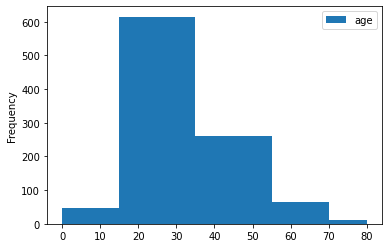

In [19]:
hospital_data.plot(y='age', kind='hist', bins=[0,15,35,55,70,80])

In [20]:
import matplotlib.pyplot as plt
explode = [0.0, 0.1, 0.2, 0.1]

([<matplotlib.patches.Wedge at 0x1bc77c3f820>,
 [Text(0.5952334099043236, 0.9250390195735916, 'pregnancy'),
  Text(-0.9468162003458401, 0.5599456069679145, 'cold'),
  Text(-0.9269044640242977, -0.592324332246979, 'stomach'),
  Text(-0.19932633431792154, -1.0817897265399503, 'sprain'),
  Text(0.44319710058782713, -1.0067652805051153, 'dislocation'),
  Text(0.895972820928252, -0.6381478701350265, 'fracture'),
  Text(1.0830207759494073, -0.192525320054126, 'heart')],
 [Text(0.32467276903872194, 0.5045667379492317, '31.8%'),
  Text(-0.51644520018864, 0.3054248765279533, '19.4%'),
  Text(-0.5055842531041623, -0.3230859994074431, '15.7%'),
  Text(-0.10872345508250265, -0.5900671235672456, '10.4%'),
  Text(0.24174387304790568, -0.5491446984573356, '8.6%'),
  Text(0.4887124477790465, -0.34808065643728714, '8.5%'),
  Text(0.590738605063313, -0.10501381093861417, '5.6%')])

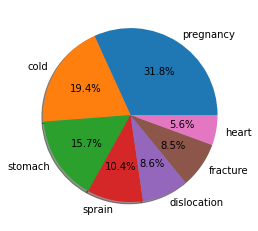

In [21]:
plt.pie((hospital_data['diagnosis'].value_counts()).values, 
        labels=(hospital_data['diagnosis'].value_counts()).axes[0], 
        autopct='%.1f%%',
        shadow=True)


{'bodies': [<matplotlib.collections.PolyCollection at 0x1bc77cce1d0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1bc77cce0b0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1bc77cce890>,
 'cbars': <matplotlib.collections.LineCollection at 0x1bc77ccec50>}

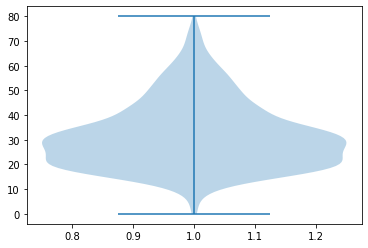

In [22]:
plt.violinplot(hospital_data['age'])


In [32]:
(hospital_data[hospital_data['hospital'] == 'general'])['age']

0      33.0
1      48.0
2      23.0
3      27.0
4      22.0
       ... 
456    19.0
457    23.0
458    48.0
459    40.0
460    38.0
Name: age, Length: 461, dtype: float64

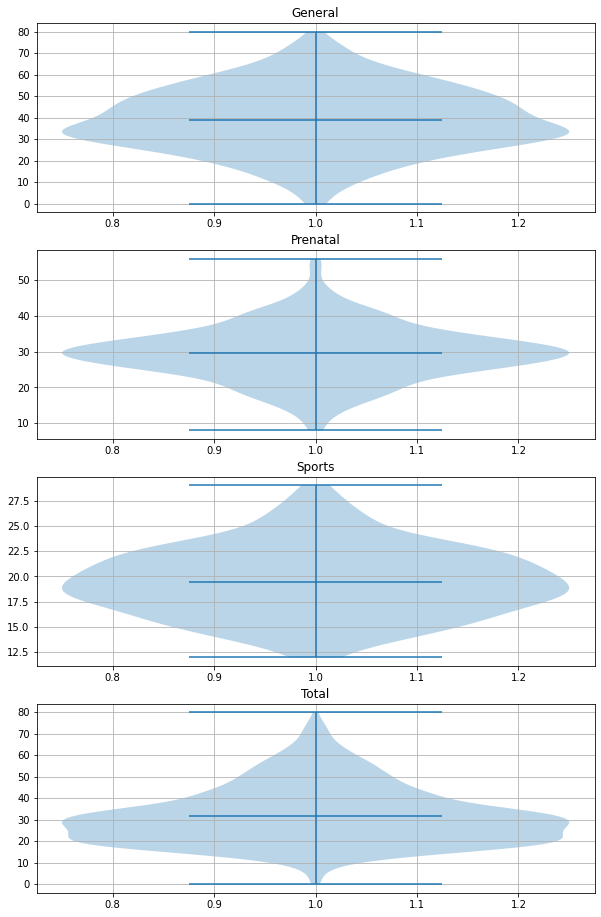

In [51]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 16))
axs[0].violinplot((hospital_data[hospital_data['hospital'] == 'general'])['age'],showmeans=True, showextrema=True)
axs[0].set_title('General')
axs[0].grid()
axs[1].violinplot((hospital_data[hospital_data['hospital'] == 'prenatal'])['age'],showmeans=True, showextrema=True)
axs[1].set_title('Prenatal')
axs[1].grid()
axs[2].violinplot((hospital_data[hospital_data['hospital'] == 'sports'])['age'],showmeans=True, showextrema=True)
axs[2].set_title('Sports')
axs[2].grid()
axs[3].violinplot(hospital_data['age'],showmeans=True, showextrema=True)
axs[3].set_title('Total')
axs[3].grid()
